In [2]:
import pandas as pd
from main import pre_process_data, ANN
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [3]:
def min_max_scaler(series):
    normalized = (series - min(series)) / (max(series)-min(series))
    return normalized

In [4]:
! pip install python-mnist


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\maicol.nicolini\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


# Example 1: Simple multiple classification

In [5]:
data = load_wine()
features = pd.DataFrame(data=data.data, columns=data.feature_names)
target = pd.DataFrame(data=data.target, columns=['class'])
df = pd.concat([features, target], axis=1)

In [6]:
for col in features.columns:
    features[col] = min_max_scaler(features[col])

In [7]:
# Train - Test Split
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.33, random_state=42)
train_x, train_y, test_x, test_y = pre_process_data(train_x.to_numpy(), train_y.to_numpy(), test_x.to_numpy(), test_y.to_numpy())


C:\Users\maicol.nicolini\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


train_x's shape: (119, 13)
test_x's shape: (59, 13)
Cost:  46.45125332791204 Train Accuracy: 39.49579831932773
Cost:  43.99241595133114 Train Accuracy: 39.49579831932773
Cost:  43.99241394627742 Train Accuracy: 39.49579831932773
Cost:  43.99241394384265 Train Accuracy: 39.49579831932773
Cost:  43.99241394145405 Train Accuracy: 39.49579831932773
Cost:  43.99241393910665 Train Accuracy: 39.49579831932773
Cost:  43.99241393680041 Train Accuracy: 39.49579831932773
Cost:  43.99241393453537 Train Accuracy: 39.49579831932773
Cost:  43.99241393231155 Train Accuracy: 39.49579831932773
Cost:  43.99241393012897 Train Accuracy: 39.49579831932773
Train Accuracy: 39.49579831932773
Test Accuracy: 40.67796610169492


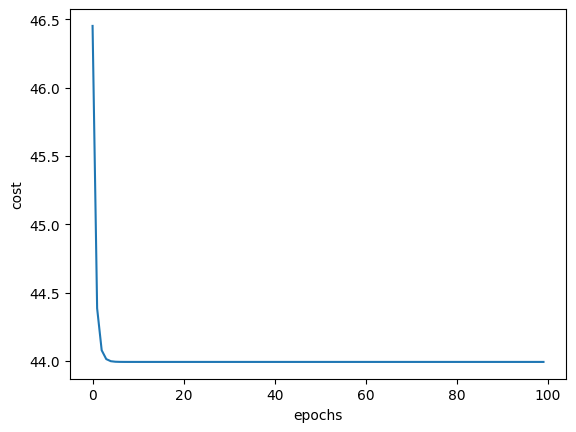

In [26]:
print("train_x's shape: " + str(train_x.shape))
print("test_x's shape: " + str(test_x.shape))

layers_dims = [train_x.shape[1], 10, 3]

ann = ANN(layers_dims)
ann.fit(train_x, train_y, learning_rate=1e-1, n_iterations=1000)
print("Train Accuracy:", ann.predict(train_x, train_y))
print("Test Accuracy:", ann.predict(test_x, test_y))
ann.plot_cost()

In [4]:
from keras.datasets import mnist

In [ ]:
! pip uninstall tensorflow

In [11]:
train_y.shape

(60000, 10)

In [10]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

train_x, train_y, test_x, test_y = pre_process_data(train_x, train_y, test_x, test_y)

print("train_x's shape: " + str(train_x.shape))
print("test_x's shape: " + str(test_x.shape))

layers_dims = [28*28, 10]

ann = ANN(layers_dims)
ann.fit(train_x, train_y, learning_rate=0.1, n_iterations=1000)
print("Train Accuracy:", ann.predict(train_x, train_y))
print("Test Accuracy:", ann.predict(test_x, test_y))
ann.plot_cost()

C:\Users\maicol.nicolini\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


train_x's shape: (60000, 28, 28)
test_x's shape: (10000, 28, 28)


MemoryError: Unable to allocate 9.81 GiB for an array with shape (784, 28, 60000) and data type float64